In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


2025-04-30 13:16:57.755747: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-30 13:16:57.771386: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 13:16:57.860492: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 13:16:57.934269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746019017.997237    1335 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746019018.01

In [4]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

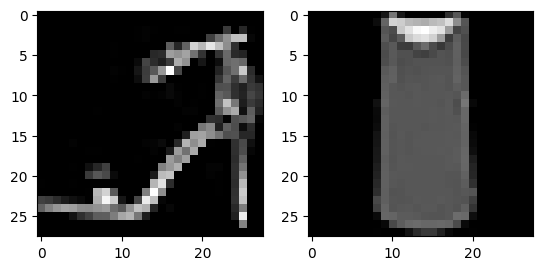

In [5]:
plt.subplot(1,2,1)
plt.imshow(x_train[8], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(x_train[2], cmap="gray");

### Normalizacion de data

In [6]:
X_train = x_train/255.
X_test = x_test/255.

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
from tensorflow.keras.backend import expand_dims

In [9]:
X_train= expand_dims(X_train, axis=-1)
X_test= expand_dims(X_test, axis=-1)

2025-04-30 13:17:00.947389: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Target encoding

In [11]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)

In [12]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

y_train

## Prueba de modelo Convolutional Neural Network (CNN)

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
def initialize_model():

    model = models.Sequential()

    model.add(layers.Conv2D(16, (4,4), input_shape =(28, 28, 1), activation = 'relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size = (2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(10, activation = 'relu'))

    model.add(layers.Dense(10, activation = 'softmax'))

    ### Model compilation
    model.compile(loss= 'categorical_crossentropy',
            optimizer= 'adam',
            metrics=['accuracy'])

    return model

### Training model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()

es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train, y_train_cat,
          batch_size=32,
          epochs=5,
          validation_split=0.3,
          callbacks=[es],
          verbose=0)

/home/vanina/.pyenv/versions/3.10.6/envs/fashion-test/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Evaluation

In [16]:
model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8771 - loss: 0.3481


[0.3421008884906769, 0.8747000098228455]

### Predict

In [17]:
predictions= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
predictions

array([[9.95482026e-08, 7.92021069e-07, 1.07818096e-07, ...,
        3.94766852e-02, 7.12381006e-05, 9.52913165e-01],
       [1.01058438e-04, 6.92317648e-10, 9.95697141e-01, ...,
        1.59701613e-10, 1.95417761e-05, 1.68708585e-08],
       [1.97298255e-06, 9.99940038e-01, 8.03418609e-10, ...,
        1.45249079e-09, 2.52682675e-09, 1.56341335e-12],
       ...,
       [2.34237430e-03, 1.61765055e-08, 4.65523655e-04, ...,
        4.66073793e-08, 9.92296398e-01, 3.36206896e-10],
       [2.11008210e-05, 9.98371899e-01, 2.29858497e-08, ...,
        7.60946084e-10, 7.41033013e-09, 1.89932683e-12],
       [1.10274658e-03, 4.92210616e-04, 2.75849045e-04, ...,
        2.61590749e-01, 5.33228040e-01, 5.98362833e-03]], dtype=float32)

In [19]:
predict_classes = np.argmax(predictions, axis=1)

print(predict_classes)

[9 2 1 ... 8 1 8]


convertir en dataframe para subir como csv

In [20]:
type(y_test)

numpy.ndarray

In [21]:
print(y_test)

[9 2 1 ... 8 1 5]


### Creacion del dataframe para subbmission

In [33]:
indices = np.arange(60001, 70001, 1)

In [34]:
indices

array([60001, 60002, 60003, ..., 69998, 69999, 70000])

In [37]:
df = pd.DataFrame({
    'id': indices,
    'label': predict_classes
})

# Guardar a CSV
df.to_csv('predicciones_fashionmnist.csv', index=False)

In [38]:
df

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6
...,...,...
9995,69996,9
9996,69997,1
9997,69998,8
9998,69999,1
